In [21]:
import torch
import torch.distributed as dist
import torch.nn.functional as F
import torch.utils.data.distributed
from torch import nn
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader, Dataset


In [22]:
import backbones
from config import config as cfg
from dataset import MXFaceDataset, DataLoaderX
from partial_classifier import DistSampleClassifier
from sgd import SGD

In [23]:
from ibug.roi_tanh_warping import (roi_tanh_polar_warp,
                                   roi_tanh_polar_to_roi_tanh,
                                   roi_tanh_to_roi_tanh_polar)

In [35]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
def show_tensor_images(image_tensor, num_images=25, size=(3, 112, 112), nrow=5, show=True):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in an uniform grid.
    '''
    image_tensor = (image_tensor + 1) / 2
    image_unflat = image_tensor.detach().cpu()
    image_grid = make_grid(image_unflat[:num_images], nrow=nrow)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    if show:
        plt.show()

In [36]:
trainset = MXFaceDataset(root_dir=cfg.rec, local_rank=0)
trainloader = DataLoader(trainset, batch_size=25)

In [37]:
for (img, label) in trainloader: break

In [47]:
img.min(), img.max()

(tensor(-1.), tensor(1.))

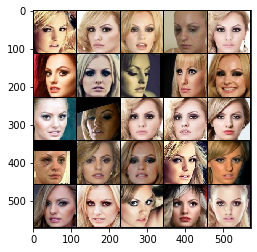

In [39]:
show_tensor_images(img)

In [40]:
def get_rois(x):
    b, _, h, w = x.size()
    rois = torch.zeros([b, 4]).float().to(x.device)
    rois[:, 2] = w-1
    rois[:, 3] = h-1
    return rois


In [42]:
rois = get_rois(img)

In [53]:
warp = roi_tanh_polar_warp(img, rois, (112,112), keep_aspect_ratio=True).clip(-1,1)

In [54]:
warp.min(), warp.max()

(tensor(-1.), tensor(1.))

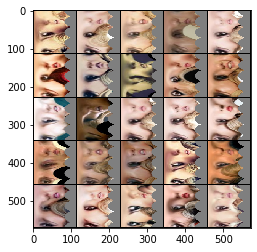

In [55]:
show_tensor_images(warp)

In [ ]:
show_tensor_images